# 🔹 Step 1: Upload kaggle.json to Colab

In [1]:
from google.colab import files
files.upload()  # Choose your downloaded `kaggle.json` file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kaustavroychowdhury","key":"9151d9ab5c01598138186efb77a81d94"}'}

# 🔹 Step 2: Configure Kaggle API

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# 🔹 Step 3: Install kaggle library (if needed)

In [3]:
!pip install -q kaggle


In [13]:
import kaggle

# 🧪 How to verify it's working in Python

In [14]:
!kaggle datasets list -s netflix

ref                                                            title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
netflix-inc/netflix-prize-data                                 Netflix Prize data                                   716193814  2019-11-13 18:39:37.417000          99525       1410  0.7647059        
shivamb/netflix-shows                                          Netflix Movies and TV Shows                            1400865  2021-09-27 04:44:36.770000         592643       9096  1.0              
imtkaggleteam/netflix                                          NetFlix                                                1224946  2023-11-05 08:01:21.163000           2934         96  1.0              
thede

# 🔹 Step 4: Download your dataset:
#🔹 Step 5: Unzip and load into pandas

In [4]:
!kaggle datasets download -d shivamb/netflix-shows
!unzip netflix-shows.zip

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 638MB/s]
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


# If you want your file extract in folder

In [12]:
!kaggle datasets download -d shivamb/netflix-shows
!unzip netflix-shows.zip -d ./netflix_shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 323MB/s]
Archive:  netflix-shows.zip
  inflating: ./netflix_shows/netflix_titles.csv  


# If you want your file extract in folder

In [11]:
!kaggle datasets download -d utkarshx27/movies-dataset
!unzip movies-dataset.zip -d ./movies_dataset


Dataset URL: https://www.kaggle.com/datasets/utkarshx27/movies-dataset
License(s): CC0-1.0
  0% 0.00/5.13M [00:00<?, ?B/s]
100% 5.13M/5.13M [00:00<00:00, 324MB/s]
Archive:  movies-dataset.zip
  inflating: ./movies_dataset/movie_dataset.csv  


#🔹 Step 6: Load with Pandas and Visualize

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

# df = pd.read_csv('./movies_dataset/movie_dataset.csv')

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


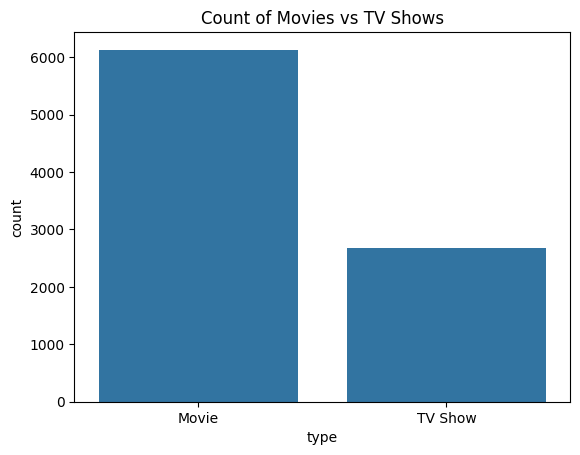

In [7]:
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.show()

# ✅ BONUS: Write SQL Queries on CSV in Colab or VS Code
You can use SQLite or pandasql:

In [8]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=af5467d1ae1e0636d22eab3ae17c8343ea1d3c5ecf3131e116f90086cb6f80aa
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [9]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT type, COUNT(*) as count
FROM df
GROUP BY type
"""

result = pysqldf(query)
print(result)


      type  count
0    Movie   6131
1  TV Show   2676


In [15]:
result

,type,count
0,Movie,6131
1,TV Show,2676


## USE DUCKDB FOR ADVANCED/COMPLEX SQL PROBLEMS

In [16]:
!pip install duckdb

In [17]:
import duckdb

duckq = lambda q: duckdb.query(q).to_df()

# Usage
query = "SELECT type, COUNT(*) as count FROM df GROUP BY type"
result = duckq(query)

In [18]:
result

,type,count
0,Movie,6131
1,TV Show,2676


| Part              | Meaning                                                     |
| ----------------- | ----------------------------------------------------------- |
| `duckq =`         | Create a new variable (your query function) called `duckq`. |
| `lambda q:`       | Anonymous function that takes a SQL query (`q`) as input.   |
| `duckdb.query(q)` | Run the SQL query using DuckDB.                             |
| `.to_df()`        | Convert the result to a pandas DataFrame. ✅                 |


In [21]:
query = """
SELECT
  title,
  type,
  release_year,
  ROW_NUMBER() OVER (PARTITION BY type ORDER BY release_year DESC) AS row_num
FROM df
WHERE release_year IS NOT NULL
LIMIT 10
"""

result = duckq(query)

In [22]:
result

,title,type,release_year,row_num
0,Cut Bank,Movie,2014,4084
1,Jeff Dunham: All Over the Map,Movie,2014,4085
2,100 Things to do Before High School,Movie,2014,4086
3,A Fairly Odd Summer,Movie,2014,4087
4,Consequences,Movie,2014,4088
5,Olmo & the Seagull,Movie,2014,4089
6,Jim Jefferies : BARE,Movie,2014,4090
7,Silent,Movie,2014,4091
8,Born in Gaza,Movie,2014,4092
9,A Little Chaos,Movie,2014,4093


## For Kaggle - DUCKDB

In [ ]:
!pip install duckdb --quiet

In [ ]:
import duckdb

# Your Netflix DataFrame
import pandas as pd
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# DuckDB shortcut function
duckq = lambda q: duckdb.query(q).to_df()

query = """

SELECT type, COUNT(*) FROM df GROUP BY type

 """

# Run a SQL query using your shortcut
result = duckq(query)
result


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style='whitegrid')

# Run your query again (optional)
query = """
SELECT type, COUNT(*) as count FROM df GROUP BY type
"""
result = duckq(query)

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=result, x='type', y='count', palette='Set2')

# Add titles and labels
plt.title("🎬 Count of Movies vs TV Shows on Netflix", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()
